# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [269]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(study_results, mouse_metadata, how = 'left', on = "Mouse ID")

# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [270]:
# Checking the number of mice.
len(mouse_study_results["Mouse ID"].unique())

249

In [271]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = mouse_study_results.loc[mouse_study_results.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dupes

array(['g989'], dtype=object)

In [272]:
# Optional: Get all the data for the duplicate mouse ID. 


In [273]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_results = mouse_study_results[mouse_study_results["Mouse ID"].isin(dupes) == False]

In [274]:
# Checking the number of mice in the clean DataFrame.
mouse_study_results["Mouse ID"].nunique()

248

In [275]:
mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [276]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = mouse_study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
medians = mouse_study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var = mouse_study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
sd = mouse_study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
stderr = mouse_study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

tumor_volume_df = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Tumor Volume Variance": var,
    "Tumor Colume Std. Dev.": sd,
    "Tumor Volume Std. Err.": stderr
})

tumor_volume_df # propriva is off. is probably the mouse that wasn't eliminated

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Colume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [277]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

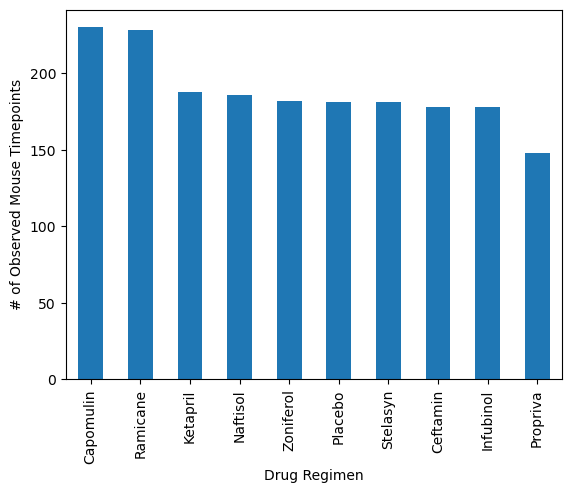

In [278]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

x_axis = mouse_study_results["Drug Regimen"].unique()
y_axis = mouse_study_results.groupby(["Drug Regimen"])["Timepoint"].count()

ID_Timepoints = pd.DataFrame({
    "Drugs": x_axis,
    "Timepoint Count": y_axis
})

ID_Timepoints.sort_values("Timepoint Count", ascending = False).plot(kind = "bar", 
                                                                     use_index = True, 
                                                                     legend = False, 
                                                                     ylabel = "# of Observed Mouse Timepoints")
plt.show()

In [279]:
mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


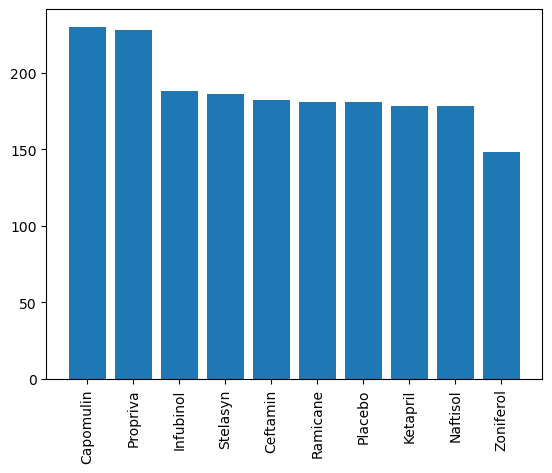

In [280]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
ID_Timepoints.sort_values("Timepoint Count", ascending = False, inplace = True)

plt.bar(ID_Timepoints["Drugs"], ID_Timepoints["Timepoint Count"])
plt.xticks(rotation = 90)
plt.show()

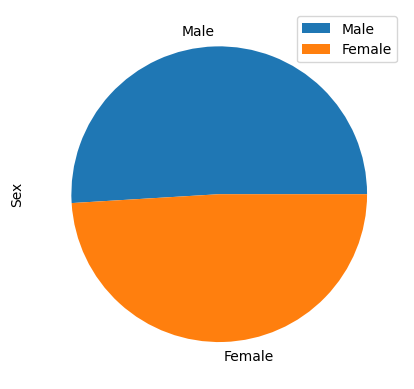

In [281]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count = mouse_study_results["Sex"].value_counts()

mouse_gender = pd.DataFrame(gender_count)

mouse_gender.plot(kind = 'pie',subplots = True)
plt.show()

In [282]:
mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


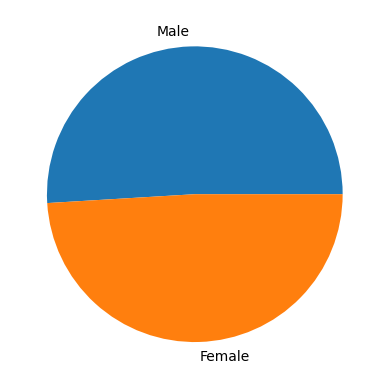

In [283]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, labels = ["Male", "Female"])
plt.show()

## Quartiles, Outliers and Boxplots

In [285]:
mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [286]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = mouse_study_results.groupby(["Mouse ID"])["Timepoint"].max()
last_tp.rename("Last Timepoint", inplace = True)
last_tp_df = pd.DataFrame(last_tp)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_results = pd.merge(mouse_study_results, last_tp_df, on = "Mouse ID")
mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [352]:
treatment_mice["Tumor Volume (mm3)"] > min_bar

9       True
1667    True
1677    True
1687    True
1697    True
1707    True
1717    True
1727    True
1731    True
1741    True
1751    True
1761    True
1771    True
1781    True
1791    True
1801    True
1811    True
1821    True
1831    True
1834    True
1844    True
1854    True
1864    True
1869    True
1879    True
Name: Tumor Volume (mm3), dtype: bool

In [400]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_mice = mouse_study_results[mouse_study_results["Drug Regimen"] == treatment]
    treatment_mice.drop_duplicates(subset = ["Mouse ID"], keep = "last", inplace = True)
    tumor_vol = list(treatment_mice['Tumor Volume (mm3)'])
    
    # add subset 
    quants = treatment_mice['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    IQR = quants[0.75] - quants[0.25]
    min_whis = quants[0.25] - 1.5*IQR
    max_whis = quants[0.75] + 1.5*IQR
    
    # Determine outliers using upper and lower bounds
    outliers = treatment_mice.loc[treatment_mice['Tumor Volume (mm3)'] < min_whis]
    outliers = outliers.loc[treatment_mice['Tumor Volume (mm3)'] > max_whis]

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Last Timepoint]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Last Timepoint]
Index: []
Infubinol's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Last Timepoint]
Index: []
Ceftamin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Last Timepoint]
Index: []


C:\Users\skp95\anaconda3\envs\pyviz\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\skp95\anaconda3\envs\pyviz\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\skp95\anaconda3\envs\pyviz\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

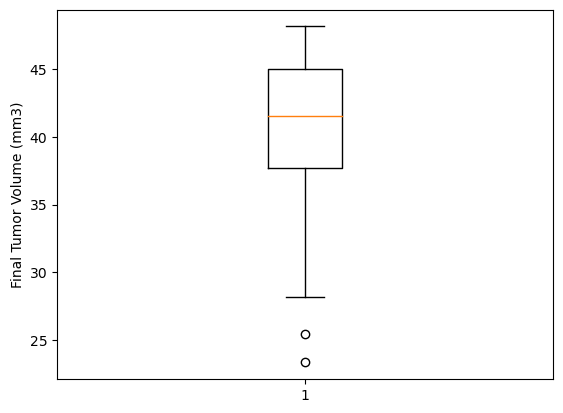

In [383]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")

for treatment in treatments:
    treatment_mice = mouse_study_results[mouse_study_results["Drug Regimen"] == treatment]
    ax.boxplot(treatment_mice["Tumor Volume (mm3)"])
    plt.show()

## Line and Scatter Plots

In [448]:
mouse_study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Last Timepoint'],
      dtype='object')

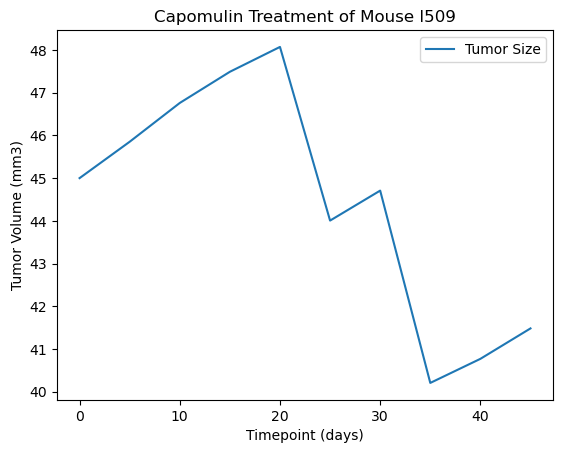

In [468]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
buddy = mouse_study_results[mouse_study_results["Mouse ID"] == "l509"]
buddy = pd.DataFrame({
    "Timepoint": buddy["Timepoint"],
    "Tumor Size": buddy["Tumor Volume (mm3)"]
})
buddy.plot(kind = "line", x = "Timepoint",y = "Tumor Size")

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

In [507]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = mouse_study_results[mouse_study_results["Drug Regimen"] == "Capomulin"]


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


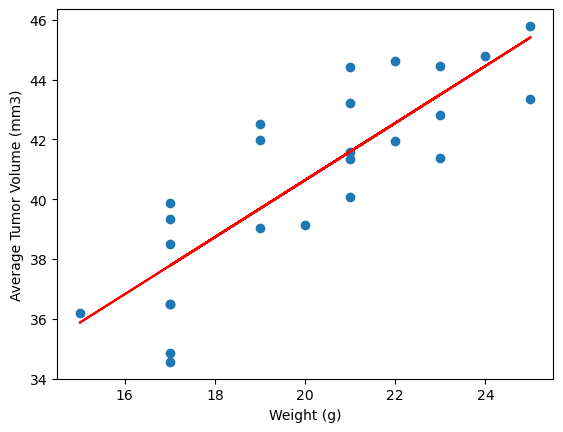

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
